In [1]:
#As inpout use the variables latest numbers
#As another input use th eforecast data


#debt
#external
#fiscal
#Curretn Account
#inflation
#reer
#rule of law
#corruption
#goverment
#average rating


#Model1 
#Variable	
#Intercept	
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#Inflation	#Average inflation during the last 3 Months (Monthly Update) *100	
#Rule law	#Standarized Ranking from WB (Annual update)	
#Dummy (1)	Turkey
#Dummy (2)Douth Africa



#Model 2
#Variable	
#Intercept	
#External_Total_Public 	External debt (foreign currency) relative to GDP (Quarterly update)
#Fiscal Balance	Average Fiscal balance of last 4 Quarters (Quarterly update) *100
#REER	Real Effective Exchange Rate
#Corruption		Standarized Ranking from WB (Annual update)
#Dummy (1)	turkey 
#Dummy (2) south africa




#Model 3
#Current_Account_to_GDP 	#Average Current Account balance of last 4 Quarters (Quarterly update) *100
#Public_Debt_GDP 	Public debt relative to GDP (Quarterly update)
#Government Effectiveness	Standarized Ranking from WB (Annual update)	 
#REER	Real Effective Exchange Rate
#Dummy (1)	turkey 
#Dummy (2) south africa



#Model 4
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)
#	Inflation	#Average inflation during the last 3 Months (Monthly Update) *100
#Rating	Average Rating (Mdys, S&P, Fitchs)
#Dummy (1)	turkey 
#Dummy (2) south africa



#Model 5
#Intercept	
#External_Total_Public 	#External debt (foreign currency) relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#REER	#Real Effective Exchange Rate	
#Rating	#Average Rating (Mdys, S&P, Fitchs)	Dummy (1)	Dummy (2)
#Dummy (1)	turkey 
#Dummy (2) south africa



#'country', 
#'cds', 
#'debt', positive
#'extd', positive
#'fiscal',  negative
#'current', negative
#'reer', negative
#'inflation', positive
#'rule',   negative
#'corruption', negative
#'effectiv',negative
#'rating',  negative
#'d001', positive
# 'd002'], positive


#higher reer, lower Cds, higher reer , less risk , higher reer more acquisiton power. 
#higher reer, lower yields
#if the number is hijger, m the czlok  depreciates, 

#version 1 most recent data last poitn in time
#version 2 average data, last point in tiome
#version 3 moist recent data, time series alst 3 months
#version 4 average data, time series last 3 month

In [2]:
#import packages

import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pandas.plotting import table
import os
from datetime import date
import seaborn as sns
from random import seed
from random import random
import numpy as np
import PIL
from PIL import Image
#import os
from PyPDF2 import PdfFileMerger
from codetiming import Timer
timeclock = Timer(name="class")
timeclock.start()
# Do something


In [3]:
# stablish date factors
today = str(date.today())
print(today)
#time stamp
end = str(today)


2021-10-14


In [4]:
#load database

cross_tmp = pd.read_csv (r'K:\2020_2431\q\sandbox\cross_tmp.csv')
cross_tmp = cross_tmp.drop_duplicates(keep='first')
cross_tmp=cross_tmp.reset_index(drop=True)
print(cross_tmp)

###create dummy
cross_tmp.loc[(cross_tmp['country'] == 'turkey') , 'd001'] = 1  
cross_tmp.loc[(cross_tmp['country'] != 'turkey') , 'd001'] = 0  
cross_tmp.loc[(cross_tmp['country'] == 'south africa') , 'd002'] = 1 
cross_tmp.loc[(cross_tmp['country'] != 'south africa') , 'd002'] = 0  

cross_tmp.columns
print(cross_tmp)
cross_base=cross_tmp
cross_base = cross_base.drop_duplicates(keep='first')
cross_base=cross_base.reset_index(drop=True)
print(cross_base)

           country    cds    debt    extd   fiscal  current    reer  \
0      philippines   67.3  0.3410  0.0930 -0.08307 -0.01233  112.68   
1   czech republic   29.9  0.4350  0.0070 -0.09140  0.02480  106.05   
2         thailand   43.3  0.4850  0.0040 -0.01605 -0.00350   99.40   
3           turkey  438.7  0.3980  0.2310 -0.03499 -0.00813   51.80   
4        indonesia   94.3  0.3946  0.1271 -0.03329 -0.00513   89.36   
5           poland   35.2  0.5910  0.1440  0.05080  0.00120   91.21   
6         malaysia   65.0  0.6430  0.0320 -0.05440  0.04268   82.89   
7            korea   21.9  0.4710  0.0100 -0.03348  0.05234  105.43   
8           mexico  102.5  0.4582  0.1021 -0.02520  0.01566   82.87   
9     south africa  215.2  0.7110  0.0610 -0.01700  0.05609   77.81   
10          israel   43.3  0.7270  0.1190 -0.05250 -0.00513  115.45   
11         hungary   49.4  0.8033  0.1517 -0.04420 -0.03660   87.67   
12        colombia  164.0  0.6468  0.2462 -0.12740 -0.06568   67.46   
13    

In [5]:
#print(cross_tmp)
#print(cross_base)

In [6]:
#Model Cross secitonal 001
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#Inflation	#Average inflation during the last 3 Months (Monthly Update) *100	
#Rule law	#Standarized Ranking from WB (Annual update)	
#Dummy (1)	Turkey
#Dummy (2)Douth Africa

#'fiscal',  negative
#'inflation', positive
#'rule',   negative
#'d001', positive
# 'd002'], positive
name=['m011']
m011=cross_tmp[['cds', 'fiscal',  'inflation', 'rule', 'd001', 'd002']]
print(m011)

Y = m011['cds']
X = m011[['fiscal', 'inflation', 'rule', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
#print(p) 
p = pd.DataFrame(p, columns = name)
print(p)   

cross_base = pd.concat([cross_base,p], axis=1).fillna(method="ffill").dropna() 
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)

      cds   fiscal  inflation  rule  d001  d002
0    67.3 -0.08307   0.031682 -0.48   0.0   0.0
1    29.9 -0.09140   0.048932  1.05   0.0   0.0
2    43.3 -0.01605   0.016722  0.10   0.0   0.0
3   438.7 -0.03499   0.195651 -0.28   1.0   0.0
4    94.3 -0.03329   0.016192 -0.34   0.0   0.0
5    35.2  0.05080   0.050948  0.45   0.0   0.0
6    65.0 -0.05440   0.020816  0.59   0.0   0.0
7    21.9 -0.03348   0.024728  1.19   0.0   0.0
8   102.5 -0.02520   0.059832 -0.66   0.0   0.0
9   215.2 -0.01700   0.048233 -0.08   0.0   1.0
10   43.3 -0.05250   0.022191  1.05   0.0   0.0
11   49.4 -0.04420   0.054673  0.49   0.0   0.0
12  164.0 -0.12740   0.045093 -0.42   0.0   0.0
13   89.6 -0.07300   0.053415  1.07   0.0   0.0
14  207.0 -0.04480   0.102940 -0.18   0.0   0.0
15   55.8  0.06782   0.007092 -0.27   0.0   0.0
16   88.1  0.01582   0.074344 -0.72   0.0   0.0
17   92.1  0.00410   0.052358 -0.49   0.0   0.0
          m011
0   108.592413
1    70.793939
2    49.915714
3   438.700000
4    71.73534

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
#Model 2
#Variable	
#Intercept	
#External_Total_Public 	External debt (foreign currency) relative to GDP (Quarterly update)
#Fiscal Balance	Average Fiscal balance of last 4 Quarters (Quarterly update) *100
#REER	Real Effective Exchange Rate
#Corruption		Standarized Ranking from WB (Annual update)
#Dummy (1)	turkey 
#Dummy (2) south africa



#'country', 
#'cds', 
#'extd', positive
#'fiscal',  negative
#'reer', negative
#'corruption', negative
#'d001', positive
# 'd002'], positive



name=['m021']
m021=cross_tmp[['cds', 'extd','fiscal',  'reer', 'corruption', 'd001', 'd002']]

Y = m021['cds']
X = m021[['extd','fiscal',  'reer', 'corruption', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1).fillna(method="ffill").dropna() 
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)




[ 65.07516496  45.91554154  68.3213659  438.7         95.30162197
  55.45971997  87.34567898  32.30523056 113.43366539 215.2
  23.37198307  90.89191616 148.67640221  71.58991397 139.70018233
   5.92423444 114.48912295  90.89825559]
          m021
0    65.075165
1    45.915542
2    68.321366
3   438.700000
4    95.301622
5    55.459720
6    87.345679
7    32.305231
8   113.433665
9   215.200000
10   23.371983
11   90.891916
12  148.676402
13   71.589914
14  139.700182
15    5.924234
16  114.489123
17   90.898256
           country    cds    debt    extd   fiscal  current    reer  \
0      philippines   67.3  0.3410  0.0930 -0.08307 -0.01233  112.68   
1   czech republic   29.9  0.4350  0.0070 -0.09140  0.02480  106.05   
2         thailand   43.3  0.4850  0.0040 -0.01605 -0.00350   99.40   
3           turkey  438.7  0.3980  0.2310 -0.03499 -0.00813   51.80   
4        indonesia   94.3  0.3946  0.1271 -0.03329 -0.00513   89.36   
5           poland   35.2  0.5910  0.1440  0.05080  0.001

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
#Model 3
#Current_Account_to_GDP 	#Average Current Account balance of last 4 Quarters (Quarterly update) *100
#Public_Debt_GDP 	Public debt relative to GDP (Quarterly update)
#Government Effectiveness	Standarized Ranking from WB (Annual update)	 
#REER	Real Effective Exchange Rate
#Dummy (1)	turkey 
#Dummy (2) south africa

#'country', 
#'cds', 
#'debt', positive
#'current', negative
#'reer', negative
#'effectiv',negative
#'d001', positive
# 'd002'], positive



name=['m031']
m031=cross_tmp[['cds', 'debt','current',  'reer', 'effectiv', 'd001', 'd002']]

Y = m031['cds']
X = m031[['debt','current',  'reer', 'effectiv', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1).fillna(method="ffill").dropna() 
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)



[ 56.73504791  33.94037308  70.86272384 438.7         88.18065975
  78.6431742   73.17508432  14.1536588  112.53835401 215.2
  21.67614787 103.66770503 145.49727808  65.26488516 165.43422619
  30.43718597  91.52867701  96.96481877]
          m031
0    56.735048
1    33.940373
2    70.862724
3   438.700000
4    88.180660
5    78.643174
6    73.175084
7    14.153659
8   112.538354
9   215.200000
10   21.676148
11  103.667705
12  145.497278
13   65.264885
14  165.434226
15   30.437186
16   91.528677
17   96.964819
           country    cds    debt    extd   fiscal  current    reer  \
0      philippines   67.3  0.3410  0.0930 -0.08307 -0.01233  112.68   
1   czech republic   29.9  0.4350  0.0070 -0.09140  0.02480  106.05   
2         thailand   43.3  0.4850  0.0040 -0.01605 -0.00350   99.40   
3           turkey  438.7  0.3980  0.2310 -0.03499 -0.00813   51.80   
4        indonesia   94.3  0.3946  0.1271 -0.03329 -0.00513   89.36   
5           poland   35.2  0.5910  0.1440  0.05080  0.001

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
#Model 4
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)
#	Inflation	#Average inflation during the last 3 Months (Monthly Update) *100
#Rating	Average Rating (Mdys, S&P, Fitchs)
#Dummy (1)	turkey 
#Dummy (2) south africa

#'country', 
#'cds', 
#'debt', positive
#'inflation', positive
#'rating',  negative
#'d001', positive
# 'd002'], positive

name=['m041']
m041=cross_tmp[['cds', 'debt','inflation',  'rating', 'd001', 'd002']]

Y = m041['cds']
X = m041[['debt','inflation',  'rating', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1).fillna(method="ffill").dropna() 
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)

[ 81.9884338   32.94449169  70.39850241 438.7         80.48909128
  72.02216005  67.9464658   14.23213811 102.25627571 215.2
  36.93257279 113.25439898 117.42505999  60.08049065 177.34832959
  32.24948546 110.92504937  78.20705431]
          m041
0    81.988434
1    32.944492
2    70.398502
3   438.700000
4    80.489091
5    72.022160
6    67.946466
7    14.232138
8   102.256276
9   215.200000
10   36.932573
11  113.254399
12  117.425060
13   60.080491
14  177.348330
15   32.249485
16  110.925049
17   78.207054
           country    cds    debt    extd   fiscal  current    reer  \
0      philippines   67.3  0.3410  0.0930 -0.08307 -0.01233  112.68   
1   czech republic   29.9  0.4350  0.0070 -0.09140  0.02480  106.05   
2         thailand   43.3  0.4850  0.0040 -0.01605 -0.00350   99.40   
3           turkey  438.7  0.3980  0.2310 -0.03499 -0.00813   51.80   
4        indonesia   94.3  0.3946  0.1271 -0.03329 -0.00513   89.36   
5           poland   35.2  0.5910  0.1440  0.05080  0.001

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
#Model 5
#Intercept	
#External_Total_Public 	#External debt (foreign currency) relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#REER	#Real Effective Exchange Rate	
#Rating	#Average Rating (Mdys, S&P, Fitchs)	Dummy (1)	Dummy (2)
#Dummy (1)	turkey 
#Dummy (2) south africa



#'country', 
#'cds', 
#'extd', positive
#'fiscal',  negative
#'reer', negative
#'rating',  negative
#'d001', positive
# 'd002'], positive



name=['m051']
m051=cross_tmp[['cds', 'extd','fiscal', 'reer','rating', 'd001', 'd002']]

Y = m051['cds']
X = m051[['extd','fiscal', 'reer','rating', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1).fillna(method="ffill").dropna() 
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)

[ 78.22485365  34.71713603  73.85322604 438.7         95.88225615
  59.80250246  85.488699    21.32409001 100.25931086 215.2
  30.04121047 102.27710789 140.52268308  72.7586152  160.43816107
   8.12866356 107.55765332  77.42383122]
          m051
0    78.224854
1    34.717136
2    73.853226
3   438.700000
4    95.882256
5    59.802502
6    85.488699
7    21.324090
8   100.259311
9   215.200000
10   30.041210
11  102.277108
12  140.522683
13   72.758615
14  160.438161
15    8.128664
16  107.557653
17   77.423831
           country    cds    debt    extd   fiscal  current    reer  \
0      philippines   67.3  0.3410  0.0930 -0.08307 -0.01233  112.68   
1   czech republic   29.9  0.4350  0.0070 -0.09140  0.02480  106.05   
2         thailand   43.3  0.4850  0.0040 -0.01605 -0.00350   99.40   
3           turkey  438.7  0.3980  0.2310 -0.03499 -0.00813   51.80   
4        indonesia   94.3  0.3946  0.1271 -0.03329 -0.00513   89.36   
5           poland   35.2  0.5910  0.1440  0.05080  0.001

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
#EMCDS Macroeconomic Model (Difference Market -Model Estimate)
#Positive (Market > Model) the model implies lower risk thant what the market prices.
#Negative (Market < Model) the modle implies higher risk thatn what the market prices.

cross_base['r_m011']=(cross_base['cds'] - cross_base['m011'])
cross_base['r_m021']=(cross_base['cds'] - cross_base['m021'])
cross_base['r_m031']=(cross_base['cds'] - cross_base['m031'])
cross_base['r_m041']=(cross_base['cds'] - cross_base['m041'])
cross_base['r_m051']=(cross_base['cds'] - cross_base['m051'])
cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)
economic=cross_base
print(cross_base)
print(economic)

           country    cds    debt    extd   fiscal  current    reer  \
0      philippines   67.3  0.3410  0.0930 -0.08307 -0.01233  112.68   
1   czech republic   29.9  0.4350  0.0070 -0.09140  0.02480  106.05   
2         thailand   43.3  0.4850  0.0040 -0.01605 -0.00350   99.40   
3           turkey  438.7  0.3980  0.2310 -0.03499 -0.00813   51.80   
4        indonesia   94.3  0.3946  0.1271 -0.03329 -0.00513   89.36   
5           poland   35.2  0.5910  0.1440  0.05080  0.00120   91.21   
6         malaysia   65.0  0.6430  0.0320 -0.05440  0.04268   82.89   
7            korea   21.9  0.4710  0.0100 -0.03348  0.05234  105.43   
8           mexico  102.5  0.4582  0.1021 -0.02520  0.01566   82.87   
9     south africa  215.2  0.7110  0.0610 -0.01700  0.05609   77.81   
10          israel   43.3  0.7270  0.1190 -0.05250 -0.00513  115.45   
11         hungary   49.4  0.8033  0.1517 -0.04420 -0.03660   87.67   
12        colombia  164.0  0.6468  0.2462 -0.12740 -0.06568   67.46   
13    

In [12]:
###Graph step
##### show ecocoemia varaibles for each case in a table. , print table
####graph for each cds and teh varaibles x5,sort
#graph with each residaul of the modesl  x5, sort

##grouped filesaall models  x1
###groups all doels residual sorted x1
economic2=economic

In [13]:
#table summary econcomic varaibles
summ = pd.read_csv (r'K:\2020_2431\q\sandbox\summary_table.csv')
summ = summ[summ.symbol != 'ARS']
summ=summ[['order','region','country','symbol']]
summ=summ[['order','region','country']]
summ['country']=summ['country'].str.lower()
#print(summ)
#print(economic)

#####adjust variabvles
economic['debt']=economic['debt'].round(2)
#economic['debt']=economic['debt'].multiply(100)
economic['extd']=economic['extd'].round(2)
#economic['extd']=economic['extd'].multiply(100)
economic['inflation']=economic['inflation'].round(4)
#economic['inflation']=economic['inflation'].multiply(100)
economic['current']=economic['current'].round(4)
economic['fiscal']=economic['fiscal'].round(4)
economic['reer']=economic['reer'].round()

economic1=economic[['country', 'cds', 'debt', 'extd', 'fiscal', 'current', 'reer','inflation', 'rule', 'corruption', 'effectiv', 'rating']]
economic1=pd.merge(summ, economic1,  how='left', left_on=['country'], right_on = ['country'])
print(economic1)

    order  region         country    cds  debt  extd  fiscal  current   reer  \
0       1   Latam          brazil  207.0  0.78  0.05 -0.0448   0.0111   60.0   
1       2   Latam          mexico  102.5  0.46  0.10 -0.0252   0.0157   83.0   
2       3   Latam            peru   92.1  0.32  0.14  0.0041  -0.0307   89.0   
3       4   Latam           chile   89.6  0.42  0.12 -0.0730  -0.0393   85.0   
4       5   Latam        colombia  164.0  0.65  0.25 -0.1274  -0.0657   67.0   
5       6  CEEMEA          poland   35.2  0.59  0.14  0.0508   0.0012   91.0   
6       7  CEEMEA  czech republic   29.9  0.44  0.01 -0.0914   0.0248  106.0   
7       8  CEEMEA         hungary   49.4  0.80  0.15 -0.0442  -0.0366   88.0   
8       9  CEEMEA          russia   88.1  0.21  0.03  0.0158   0.0590   76.0   
9      10  CEEMEA    south africa  215.2  0.71  0.06 -0.0170   0.0561   78.0   
10     11  CEEMEA          israel   43.3  0.73  0.12 -0.0525  -0.0051  115.0   
11     12  CEEMEA          turkey  438.7

K:\2020_2431\q\cds_report\images\cross_eco\report
2021-10-14 12:25:26.606272
K:\2020_2431\q\cds_report\images\cross_eco\2021-10-14_EMCDS Economic Cross Sectional Summary ModelA0003_fig.pdf


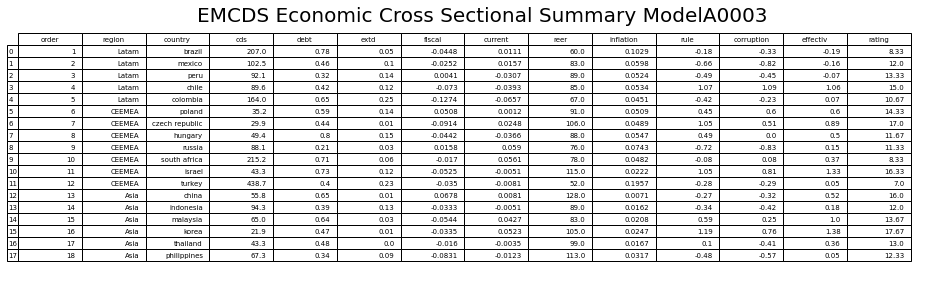

In [14]:
ms = pd.DataFrame(economic1)

#PART 1 SUMARRY  
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())

  
final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report_f\\")
final_location_last = '.pdf'

#file location
location_first= ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\")
today = str(date.today())+"_"
location_last = '_fig.pdf'

#title_graph="EM CDS - Rating Fit Model "
label="EMCDS Economic Cross Sectional Summary ModelA0003"
dateTimeObj = str(datetime.now())
print(dateTimeObj)
location=location_first+today+label+location_last
#location=location_first+label+dateTimeObj+location_last
print(location)


# set fig size
fig, ax = plt.subplots(figsize=(16, 5)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
tab = table(ax, ms, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(7) 
plt.title(label, size=20)
plt.xlabel("TODAY DATE TIME", size=20)
# save the result
plt.savefig(location)
plt.savefig("001_summary_economic.pdf")
plt.savefig(final_location_first+ "001_summary_Eco" +final_location_last )


plt.show()

In [15]:
seed(1)
z=random()
print(z) 

0.13436424411240122


In [16]:
economic2=economic2[['country', 'cds','m011','r_m011','m021','r_m021','m031','r_m031','m041','r_m041','m051','r_m051']]
economic2=pd.merge(summ, economic2,  how='left', left_on=['country'], right_on = ['country'])
###
economic2['m011']=economic2['m011'].round(1)
economic2['m021']=economic2['m021'].round(1)
economic2['m031']=economic2['m031'].round(1)
economic2['m041']=economic2['m041'].round(1)
economic2['m051']=economic2['m051'].round(1)
####
economic2['r_m011']=(economic2['r_m011'].round(3)+z)
economic2['r_m021']=(economic2['r_m021'].round(3)+z)
economic2['r_m031']=(economic2['r_m031'].round(3)+z)
economic2['r_m041']=(economic2['r_m041'].round(3)+z)
economic2['r_m051']=(economic2['r_m051'].round(3)+z)


####
economic2['r_m011']=(economic2['r_m011'].round(2))
economic2['r_m021']=(economic2['r_m021'].round(2))
economic2['r_m031']=(economic2['r_m031'].round(2))
economic2['r_m041']=(economic2['r_m041'].round(2))
economic2['r_m051']=(economic2['r_m051'].round(2))


print(economic2)

    order  region         country    cds   m011  r_m011   m021  r_m021   m031  \
0       1   Latam          brazil  207.0  149.7   57.41  139.7   67.43  165.4   
1       2   Latam          mexico  102.5  120.9  -18.29  113.4  -10.80  112.5   
2       3   Latam            peru   92.1   97.5   -5.27   90.9    1.34   97.0   
3       4   Latam           chile   89.6   67.7   21.99   71.6   18.14   65.3   
4       5   Latam        colombia  164.0  134.2   29.90  148.7   15.46  145.5   
5       6  CEEMEA          poland   35.2   45.1   -9.76   55.5  -20.13   78.6   
6       7  CEEMEA  czech republic   29.9   70.8  -40.76   45.9  -15.88   33.9   
7       8  CEEMEA         hungary   49.4   80.3  -30.75   90.9  -41.36  103.7   
8       9  CEEMEA          russia   88.1  122.2  -33.92  114.5  -26.25   91.5   
9      10  CEEMEA    south africa  215.2  215.2    0.13  215.2    0.13  215.2   
10     11  CEEMEA          israel   43.3   32.6   10.87   23.4   20.06   21.7   
11     12  CEEMEA          t

K:\2020_2431\q\cds_report\images\cross_eco\report
2021-10-14 12:25:35.062879
K:\2020_2431\q\cds_report\images\cross_eco\2021-10-14_EMCDS Economic Cross Sectional Summary ModelA0003_Output_fig.pdf


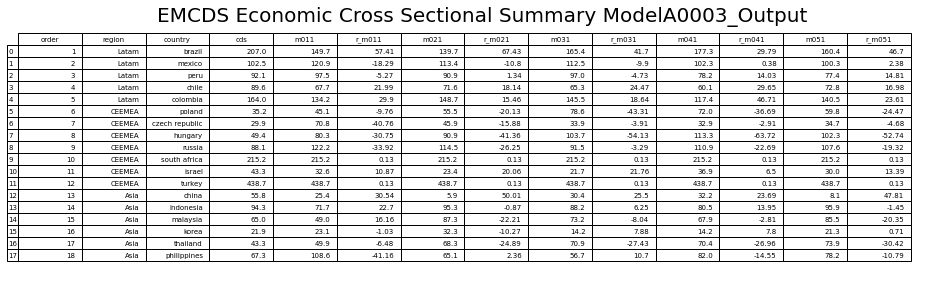

In [17]:
ms = pd.DataFrame(economic2)

#PART 1 SUMARRY  
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())

  
final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report_f\\")
final_location_last = '.pdf'

#file location
location_first= ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\")
today = str(date.today())+"_"
location_last = '_fig.pdf'

#title_graph="EM CDS - Rating Fit Model "
label="EMCDS Economic Cross Sectional Summary ModelA0003_Output"
dateTimeObj = str(datetime.now())
print(dateTimeObj)
location=location_first+today+label+location_last
#location=location_first+label+dateTimeObj+location_last
print(location)


# set fig size
fig, ax = plt.subplots(figsize=(16, 5)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
tab = table(ax, ms, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(7) 
plt.title(label, size=20)
plt.xlabel("TODAY DATE TIME", size=20)
# save the result
plt.savefig(location)
plt.savefig("002_summary_cross_model.pdf")
plt.savefig(final_location_first+ "001_summary_Model" +final_location_last )


plt.show()

In [18]:
#economic2
#be carefulllllll
graph_data=economic2

K:\2020_2431\q\cds_report\images\cross_eco\report
    order         country  order_1
0      11          turkey       10
1       9    south africa       20
2       0          brazil       30
3       4        colombia       40
4       1          mexico       50
5      13       indonesia       60
6       2            peru       70
7       3           chile       80
8       8          russia       90
9      17     philippines      100
10     14        malaysia      110
11     12           china      120
12      7         hungary      130
13     10          israel      140
14     16        thailand      150
15      5          poland      160
16      6  czech republic      170
17     15           korea      180
   order order_sort  order_2
0      1        cds        1
1      2       m011        2
           country Status  Values order_sort  order_3
22          turkey    cds   438.7        cds       10
23          turkey   m011   438.7       m011       20
18    south africa    cds   215.2   

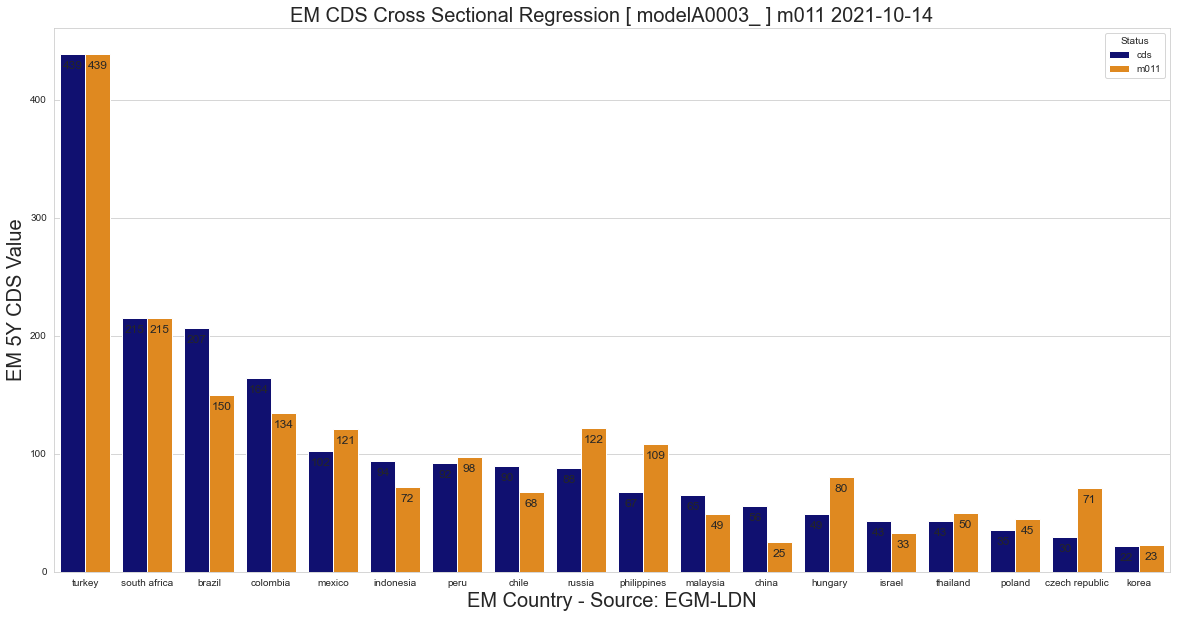

    order         country  order_1
0      11          turkey       10
1       9    south africa       20
2       0          brazil       30
3       4        colombia       40
4       1          mexico       50
5      13       indonesia       60
6       2            peru       70
7       3           chile       80
8       8          russia       90
9      17     philippines      100
10     14        malaysia      110
11     12           china      120
12      7         hungary      130
13     10          israel      140
14     16        thailand      150
15      5          poland      160
16      6  czech republic      170
17     15           korea      180
   order order_sort  order_2
0      1        cds        1
1      2       m021        2
           country Status  Values order_sort  order_3
22          turkey    cds   438.7        cds       10
23          turkey   m021   438.7       m021       20
18    south africa    cds   215.2        cds       20
0           brazil    cds   207.

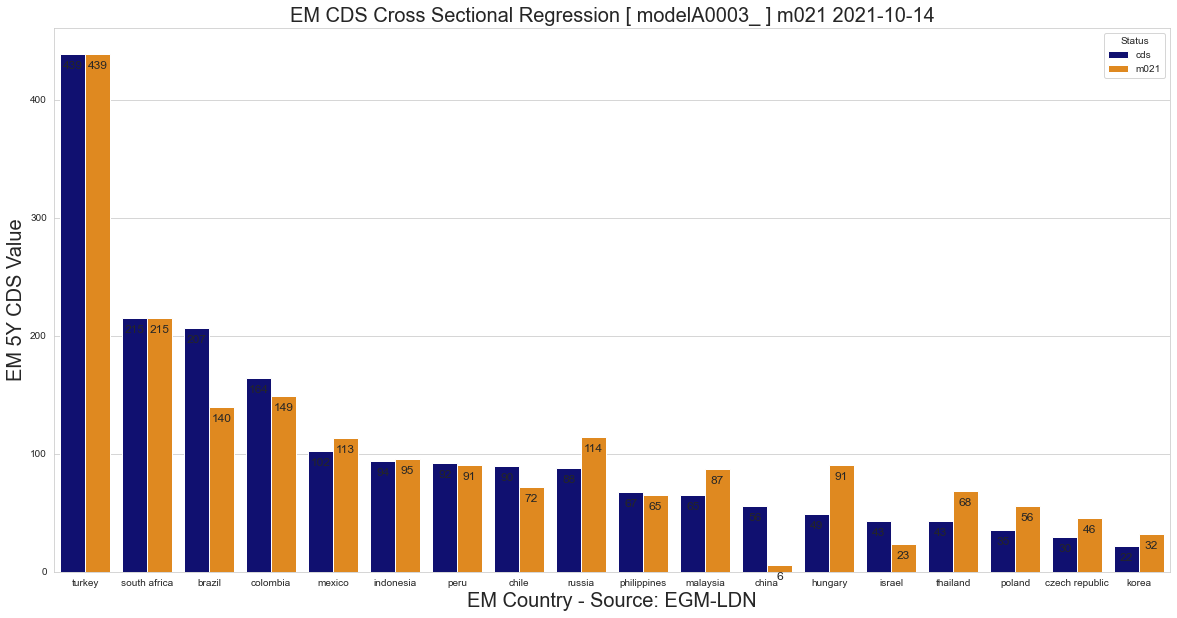

    order         country  order_1
0      11          turkey       10
1       9    south africa       20
2       0          brazil       30
3       4        colombia       40
4       1          mexico       50
5      13       indonesia       60
6       2            peru       70
7       3           chile       80
8       8          russia       90
9      17     philippines      100
10     14        malaysia      110
11     12           china      120
12      7         hungary      130
13     10          israel      140
14     16        thailand      150
15      5          poland      160
16      6  czech republic      170
17     15           korea      180
   order order_sort  order_2
0      1        cds        1
1      2       m031        2
           country Status  Values order_sort  order_3
22          turkey    cds   438.7        cds       10
23          turkey   m031   438.7       m031       20
18    south africa    cds   215.2        cds       20
0           brazil    cds   207.

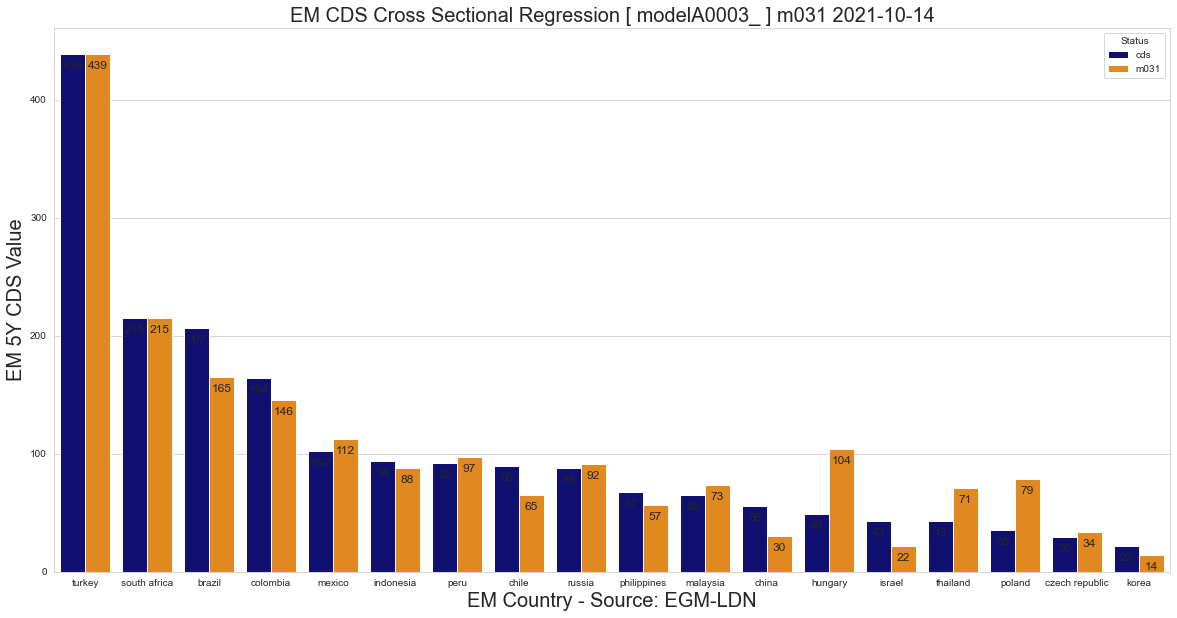

    order         country  order_1
0      11          turkey       10
1       9    south africa       20
2       0          brazil       30
3       4        colombia       40
4       1          mexico       50
5      13       indonesia       60
6       2            peru       70
7       3           chile       80
8       8          russia       90
9      17     philippines      100
10     14        malaysia      110
11     12           china      120
12      7         hungary      130
13     10          israel      140
14     16        thailand      150
15      5          poland      160
16      6  czech republic      170
17     15           korea      180
   order order_sort  order_2
0      1        cds        1
1      2       m041        2
           country Status  Values order_sort  order_3
22          turkey    cds   438.7        cds       10
23          turkey   m041   438.7       m041       20
18    south africa    cds   215.2        cds       20
0           brazil    cds   207.

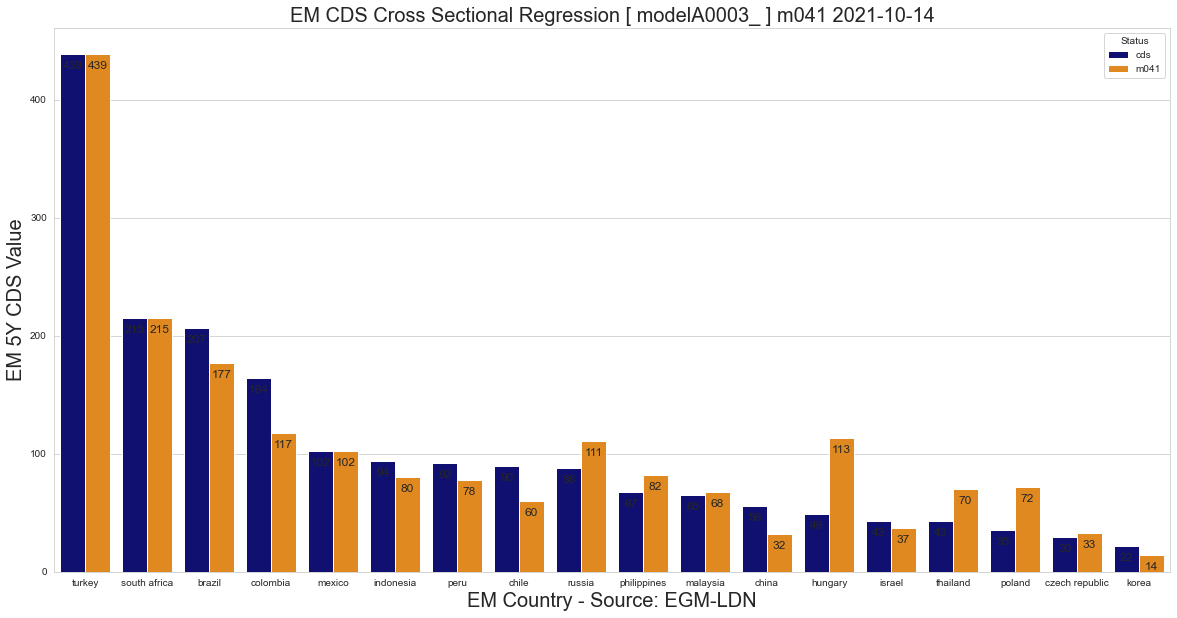

    order         country  order_1
0      11          turkey       10
1       9    south africa       20
2       0          brazil       30
3       4        colombia       40
4       1          mexico       50
5      13       indonesia       60
6       2            peru       70
7       3           chile       80
8       8          russia       90
9      17     philippines      100
10     14        malaysia      110
11     12           china      120
12      7         hungary      130
13     10          israel      140
14     16        thailand      150
15      5          poland      160
16      6  czech republic      170
17     15           korea      180
   order order_sort  order_2
0      1        cds        1
1      2       m051        2
           country Status  Values order_sort  order_3
22          turkey    cds   438.7        cds       10
23          turkey   m051   438.7       m051       20
18    south africa    cds   215.2        cds       20
0           brazil    cds   207.

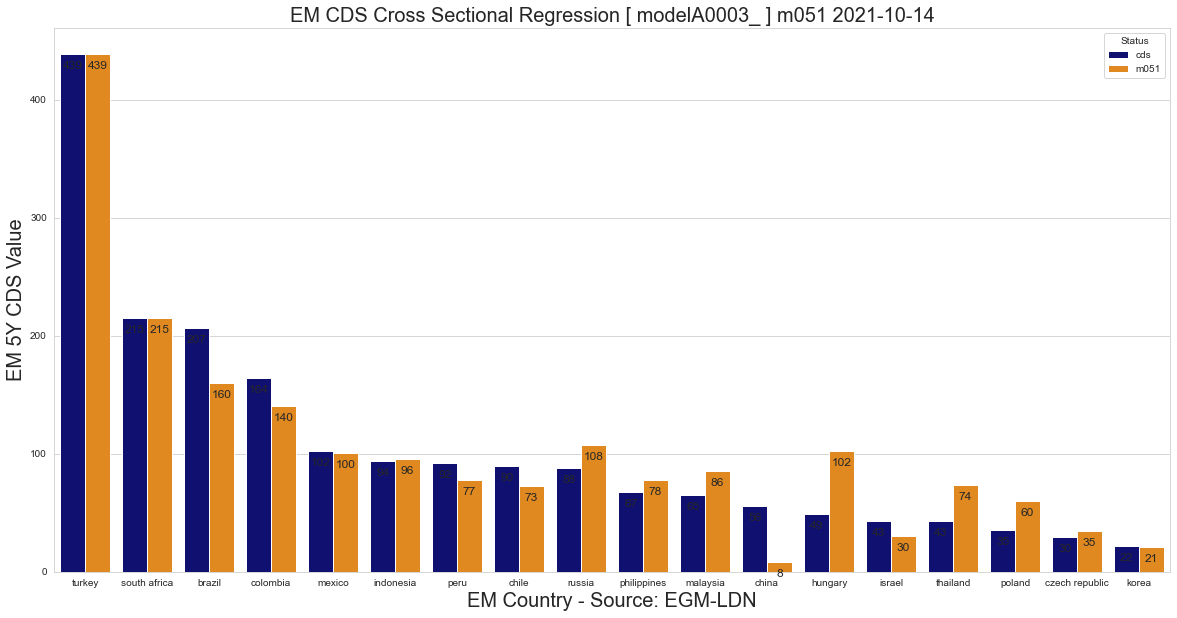

In [19]:
####graph for each cds and teh varaibles x5,sort
#graph with each residaul of the modesl  x5, sort

###https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
#part 3 pdf ALL COUNTRUES
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())


location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report_f\\")
location_last = '.pdf'


########update!--------------
name='modelA0003_'
methodology="EM CDS Cross Sectional Regression"
variable_text='latest CDS market value'
#filter_text ="No filter"
#expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
comparison="XCountry Comparison"
p_parameter=2
title_graph="EM CDS - Rating Fit Model "
c_label="EM Country - Source: EGM-LDN"
y_label="EM 5Y CDS Value"
fig_name="cross economic"

########---------------------



lst = ['m011','m021','m031','m041','m051']
####
#lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    model=str(lst[x])   
    graph_input= graph_data[['country','cds',str(model)]]
    chart=graph_input
    order_t=chart[['country','cds']]
    order_t = order_t.sort_values(['cds'], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t['cds']
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    print(o_list)
    
    ########---------------------
    
    title_text=(methodology+" "+name_text+" "+model+" "+end)
    location=location_first+today+name+model+location_last
    fig_name_t=fig_name+model+".jpg"
    r_name="r_"+name

    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)


    #large and height
    plt.figure(figsize=(20,10))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
    plt.ylabel(str(y_label), size=20)
    plt.xlabel(str(c_label), size=20)
    plt.title(str(title_text), size=20)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location, bbox_inches='tight')
    plt.savefig(fig_name_t, bbox_inches='tight')
    plt.show()

K:\2020_2431\q\cds_report\images\cross_eco\report
    order         country  order_1
0       0          brazil       10
1      12           china       20
2       4        colombia       30
3      13       indonesia       40
4       3           chile       50
5      14        malaysia       60
6      10          israel       70
7      11          turkey       80
8       9    south africa       90
9      15           korea      100
10      2            peru      110
11     16        thailand      120
12      5          poland      130
13      1          mexico      140
14      7         hungary      150
15      8          russia      160
16      6  czech republic      170
17     17     philippines      180
   order order_sort  order_2
0      1     r_m011        1
           country  Status  Values order_sort  order_3
0           brazil  r_m011   57.41     r_m011       10
12           china  r_m011   30.54     r_m011       20
4         colombia  r_m011   29.90     r_m011       30
13     

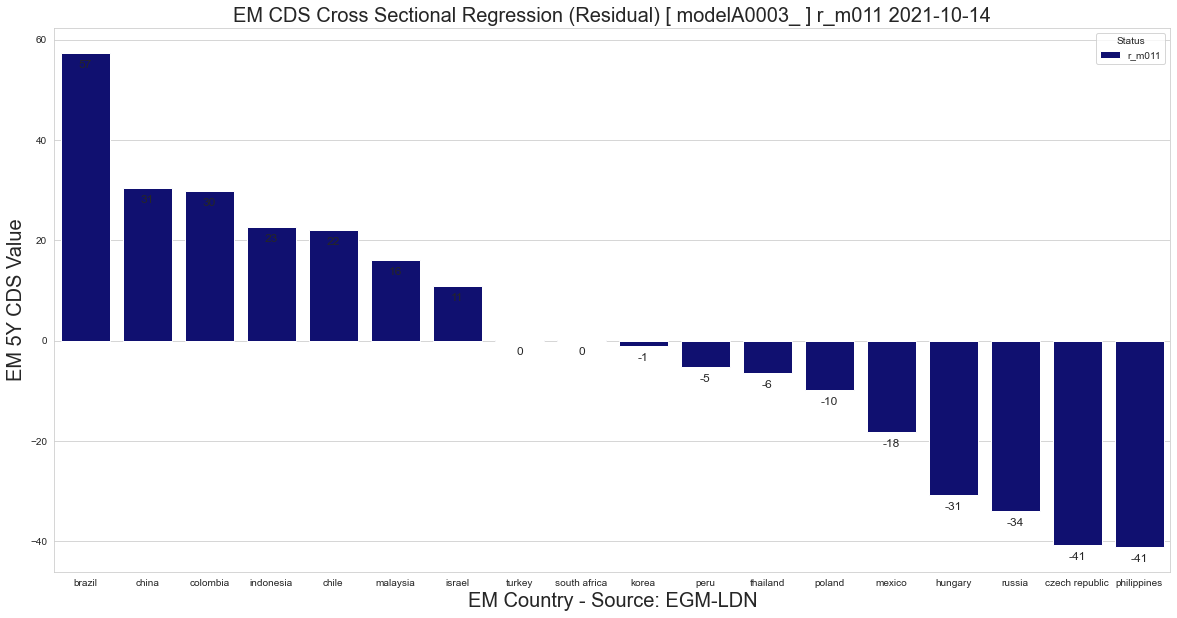

    order         country  order_1
0       0          brazil       10
1      12           china       20
2      10          israel       30
3       3           chile       40
4       4        colombia       50
5      17     philippines       60
6       2            peru       70
7      11          turkey       80
8       9    south africa       90
9      13       indonesia      100
10     15           korea      110
11      1          mexico      120
12      6  czech republic      130
13      5          poland      140
14     14        malaysia      150
15     16        thailand      160
16      8          russia      170
17      7         hungary      180
   order order_sort  order_2
0      1     r_m021        1
           country  Status  Values order_sort  order_3
0           brazil  r_m021   67.43     r_m021       10
12           china  r_m021   50.01     r_m021       20
10          israel  r_m021   20.06     r_m021       30
3            chile  r_m021   18.14     r_m021       40
4 

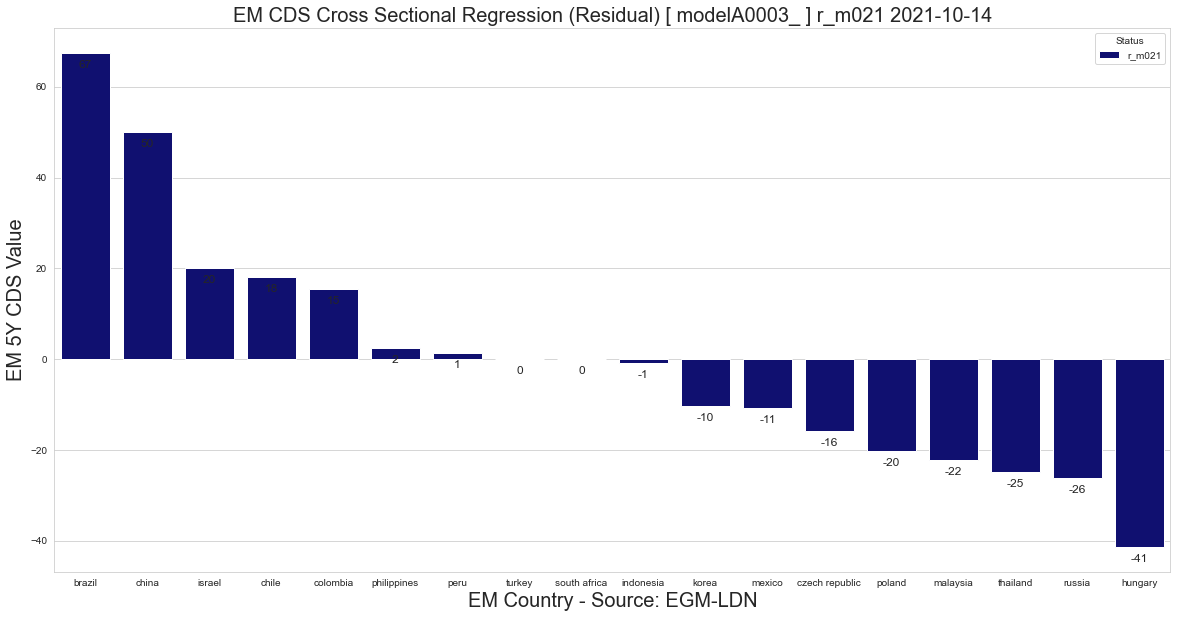

    order         country  order_1
0       0          brazil       10
1      12           china       20
2       3           chile       30
3      10          israel       40
4       4        colombia       50
5      17     philippines       60
6      15           korea       70
7      13       indonesia       80
8      11          turkey       90
9       9    south africa      100
10      8          russia      110
11      6  czech republic      120
12      2            peru      130
13     14        malaysia      140
14      1          mexico      150
15     16        thailand      160
16      5          poland      170
17      7         hungary      180
   order order_sort  order_2
0      1     r_m031        1
           country  Status  Values order_sort  order_3
0           brazil  r_m031   41.70     r_m031       10
12           china  r_m031   25.50     r_m031       20
3            chile  r_m031   24.47     r_m031       30
10          israel  r_m031   21.76     r_m031       40
4 

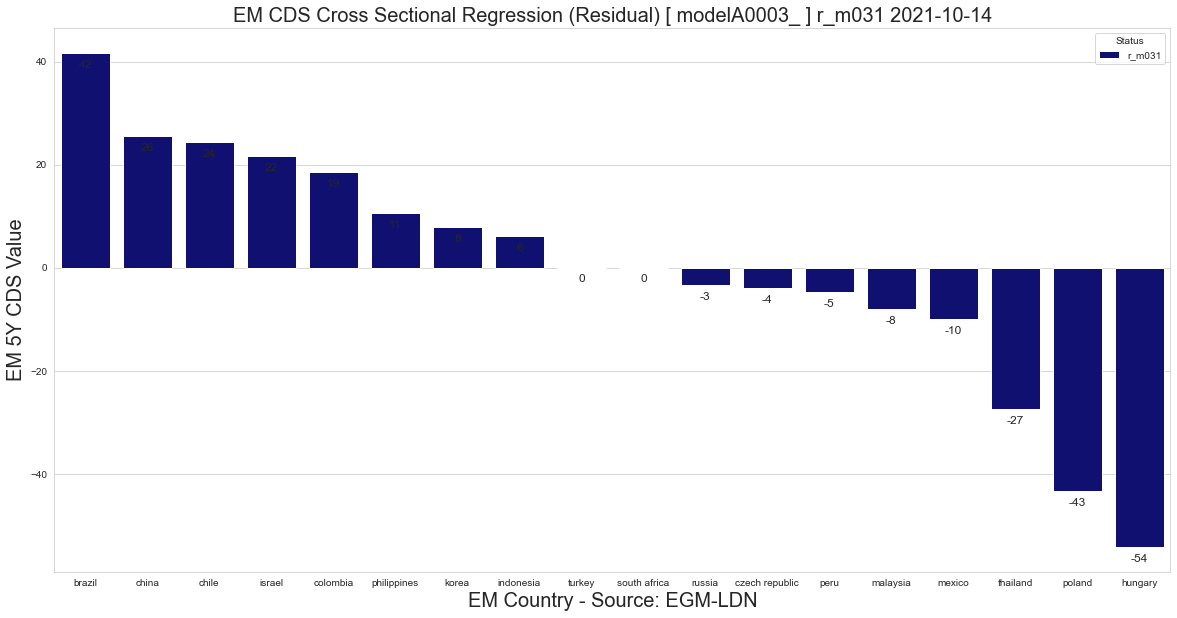

    order         country  order_1
0       4        colombia       10
1       0          brazil       20
2       3           chile       30
3      12           china       40
4       2            peru       50
5      13       indonesia       60
6      15           korea       70
7      10          israel       80
8       1          mexico       90
9      11          turkey      100
10      9    south africa      110
11     14        malaysia      120
12      6  czech republic      130
13     17     philippines      140
14      8          russia      150
15     16        thailand      160
16      5          poland      170
17      7         hungary      180
   order order_sort  order_2
0      1     r_m041        1
           country  Status  Values order_sort  order_3
4         colombia  r_m041   46.71     r_m041       10
0           brazil  r_m041   29.79     r_m041       20
3            chile  r_m041   29.65     r_m041       30
12           china  r_m041   23.69     r_m041       40
2 

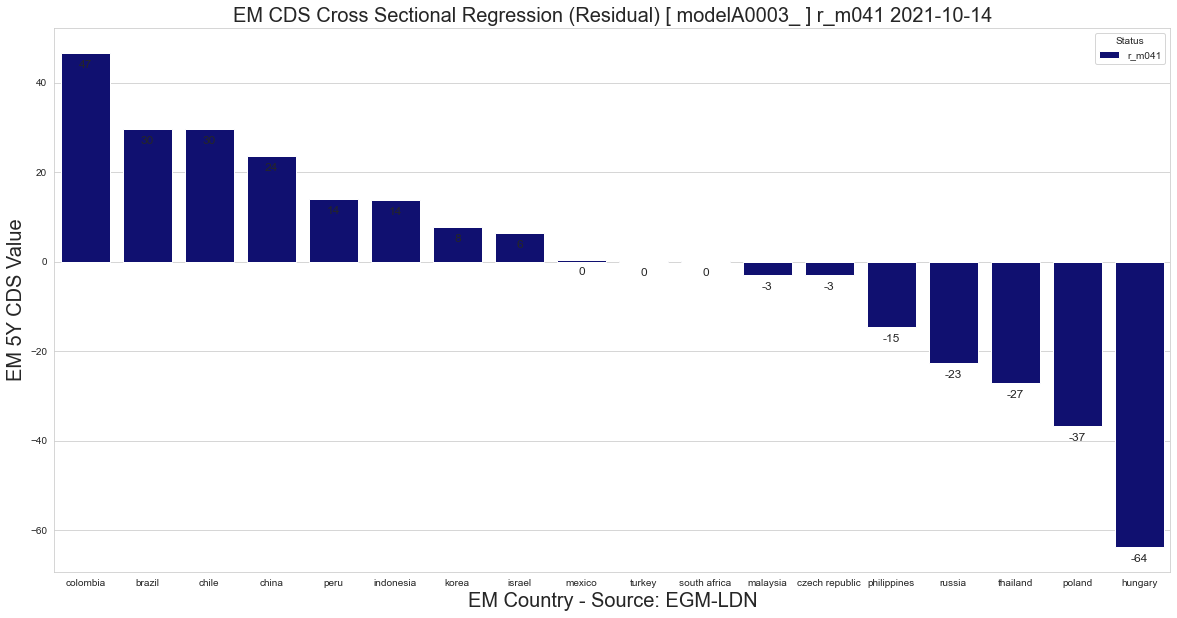

    order         country  order_1
0      12           china       10
1       0          brazil       20
2       4        colombia       30
3       3           chile       40
4       2            peru       50
5      10          israel       60
6       1          mexico       70
7      15           korea       80
8      11          turkey       90
9       9    south africa      100
10     13       indonesia      110
11      6  czech republic      120
12     17     philippines      130
13      8          russia      140
14     14        malaysia      150
15      5          poland      160
16     16        thailand      170
17      7         hungary      180
   order order_sort  order_2
0      1     r_m051        1
           country  Status  Values order_sort  order_3
12           china  r_m051   47.81     r_m051       10
0           brazil  r_m051   46.70     r_m051       20
4         colombia  r_m051   23.61     r_m051       30
3            chile  r_m051   16.98     r_m051       40
2 

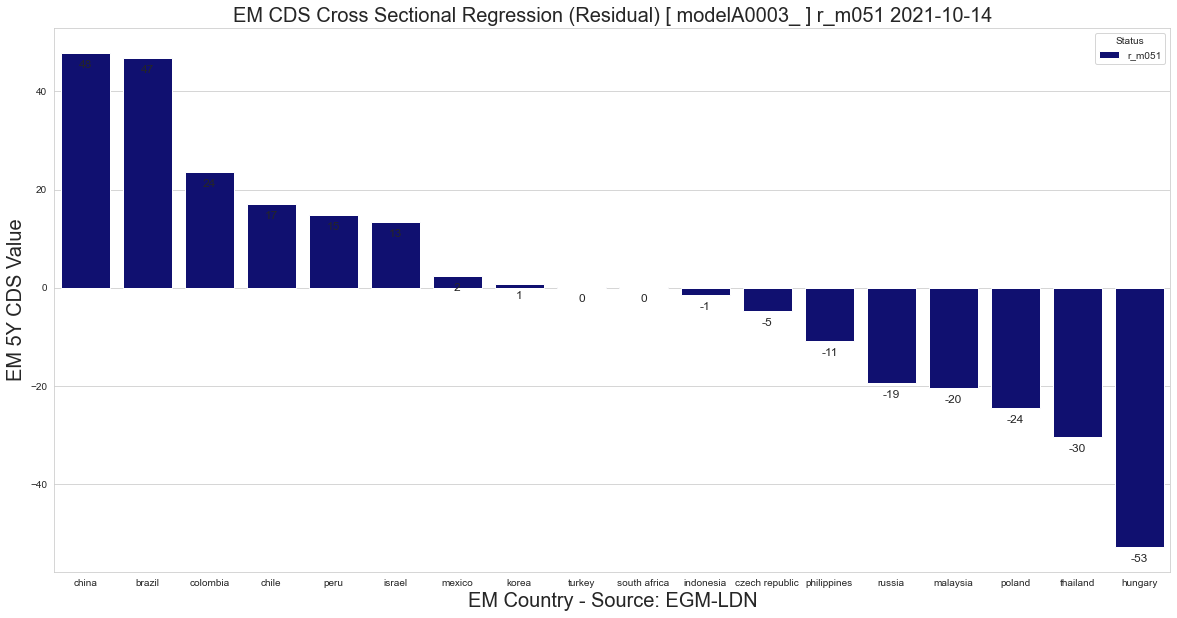

In [20]:
####RESIDUAL
###https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
#part 3 pdf ALL COUNTRUES
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())


location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report_f\\")
location_last = '.pdf'


########update!--------------
name='modelA0003_'
methodology="EM CDS Cross Sectional Regression (Residual)"
variable_text='latest CDS market value'
#filter_text ="No filter"
#expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
comparison="XCountry Comparison"
p_parameter=2
title_graph="EM CDS - Rating Fit Model "
c_label="EM Country - Source: EGM-LDN"
y_label="EM 5Y CDS Value"
fig_name="cross economic res"

########---------------------



lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    model=str(lst[x])   
    graph_input= graph_data[['country',str(model)]]
    chart=graph_input
    order_t=chart[['country',str(model)]]
    order_t = order_t.sort_values([str(model)], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t[str(model)]
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    print(o_list)
    


    ########---------------------
    title_text=(methodology+" "+name_text+" "+model+" "+end)
    location=location_first+today+name+model+location_last
    fig_name_t=fig_name+model+".jpg"
    r_name="r_"+name

    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)


    #large and height
    plt.figure(figsize=(20,10))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
    plt.ylabel(str(y_label), size=20)
    plt.xlabel(str(c_label), size=20)
    plt.title(str(title_text), size=20)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location, bbox_inches='tight')
    plt.savefig(fig_name_t, bbox_inches='tight')
    plt.show()
    





In [21]:
    
#pART 

    
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())

final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\tc\\report_f\\")
final_location_last = '.pdf'

#######
list_im = ["cross economicm011.jpg","cross economic resr_m011.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm011f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 



#######
list_im = ["cross economicm021.jpg","cross economic resr_m021.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm021f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 


#######
list_im = ["cross economicm031.jpg","cross economic resr_m031.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm031f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 


#######
list_im = ["cross economicm041.jpg","cross economic resr_m041.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm041f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 




#######
list_im = ["cross economicm051.jpg","cross economic resr_m051.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm051f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 



K:\2020_2431\q\cds_report\images\cross_eco\report


<ipython-input-21-2759a2e74658>:15: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-21-2759a2e74658>:18: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-21-2759a2e74658>:30: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-2

In [22]:
###########
#############
print(graph_data)

    order  region         country    cds   m011  r_m011   m021  r_m021   m031  \
0       1   Latam          brazil  207.0  149.7   57.41  139.7   67.43  165.4   
1       2   Latam          mexico  102.5  120.9  -18.29  113.4  -10.80  112.5   
2       3   Latam            peru   92.1   97.5   -5.27   90.9    1.34   97.0   
3       4   Latam           chile   89.6   67.7   21.99   71.6   18.14   65.3   
4       5   Latam        colombia  164.0  134.2   29.90  148.7   15.46  145.5   
5       6  CEEMEA          poland   35.2   45.1   -9.76   55.5  -20.13   78.6   
6       7  CEEMEA  czech republic   29.9   70.8  -40.76   45.9  -15.88   33.9   
7       8  CEEMEA         hungary   49.4   80.3  -30.75   90.9  -41.36  103.7   
8       9  CEEMEA          russia   88.1  122.2  -33.92  114.5  -26.25   91.5   
9      10  CEEMEA    south africa  215.2  215.2    0.13  215.2    0.13  215.2   
10     11  CEEMEA          israel   43.3   32.6   10.87   23.4   20.06   21.7   
11     12  CEEMEA          t

K:\2020_2431\q\cds_report\images\cross_eco\report
    order         country  order_1
0      11          turkey       10
1       9    south africa       20
2       0          brazil       30
3       4        colombia       40
4       1          mexico       50
5      13       indonesia       60
6       2            peru       70
7       3           chile       80
8       8          russia       90
9      17     philippines      100
10     14        malaysia      110
11     12           china      120
12      7         hungary      130
13     10          israel      140
14     16        thailand      150
15      5          poland      160
16      6  czech republic      170
17     15           korea      180
   order order_sort  order_2
0      1        cds        1
1      2       m011        2
2      3       m021        3
3      4       m031        4
4      5       m041        5
5      6       m051        6
            country Status  Values order_sort  order_3
66           turkey    cds 

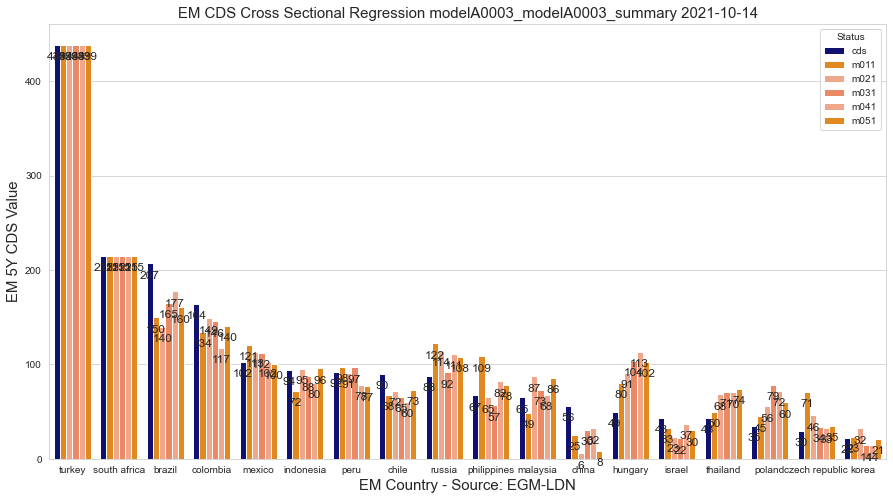

In [23]:
########update!--------------
###sumarry models
########---------------------


parameter_y=15
parameter_x=15
parameter_z=15
parameter_f1=15    
parameter_f2=8   
parameter_t=10



os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())


location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report\\004_")
location_last = '.pdf'


########update!--------------
name_series='modelA0003_summary'
methodology="EM CDS Cross Sectional Regression "
variable_text='latest CDS market value'
#filter_text ="No filter"
#expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
comparison="XCountry Comparison"
p_parameter=2
title_graph="EM CDS - Rating Fit Model "
x_label="EM Country - Source: EGM-LDN"
y_label="EM 5Y CDS Value"
fig_name="cross economic res"
z_title ="EM CDS Cross Sectional Regression "
########---------------------


name_text=name + name_series
z_title1=z_title+name_text+" "+end
location=location_first+name_series+location_last
    
    
graph_input=graph_data[['country','cds','m011','m021','m031','m041','m051']]
chart=graph_input
order_t=chart[['country','cds']]
order_t = order_t.sort_values(['cds'], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t['cds']
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)
 

chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#graph specifics
#large and height
plt.figure(figsize=(parameter_f1,parameter_f2))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(y_label, size=parameter_y)
plt.xlabel(x_label, size=parameter_x)
plt.title(z_title1, size=parameter_z)
plt.tick_params(labelsize=parameter_t)

for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location)
plt.show()


    
    
    

K:\2020_2431\q\cds_report\images\cross_eco\scatterplot


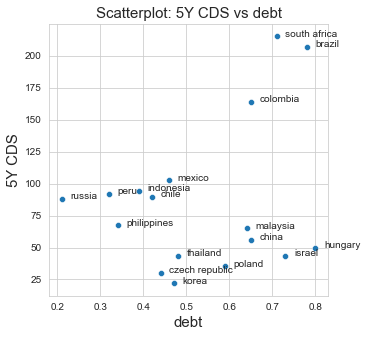

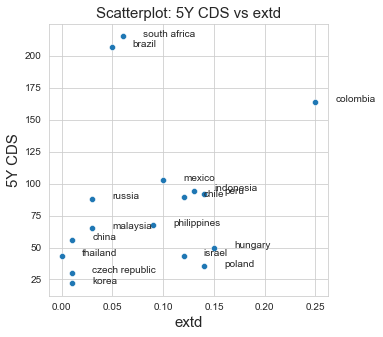

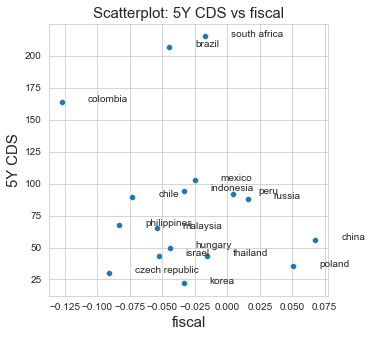

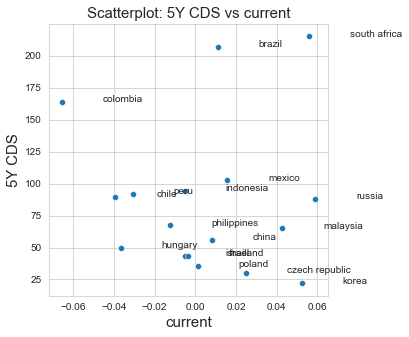

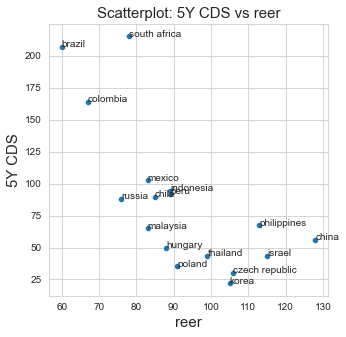

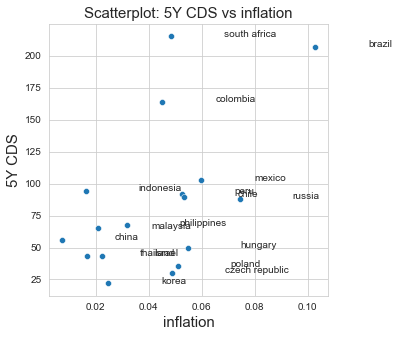

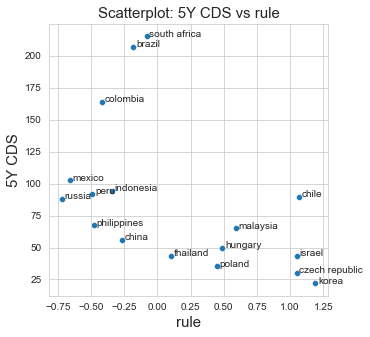

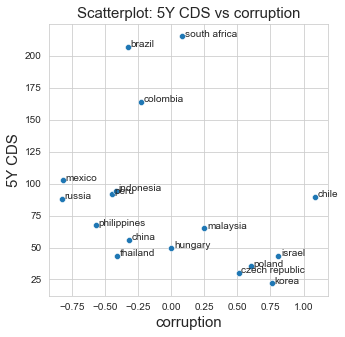

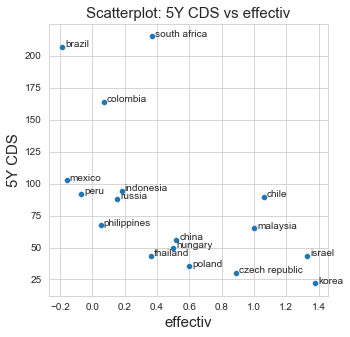

In [24]:
#print(economic1)
#debt  extd  fiscal  current   reer
#inflation  rule  corruption  effectiv  rating 

    
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/scatterplot')
print(os.getcwd())

#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\tc\\report_f\\")
#final_location_last = '.pdf'


df = economic1
df = df[df.country != 'turkey']
y_label="5Y CDS"
title0="Scatterplot: 5Y CDS vs "
parameter_l=15
parameter_1=5
parameter_2=5

######################################################
x_variable="debt"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="extd"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="fiscal"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="current"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="reer"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="inflation"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="rule"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="corruption"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="effectiv"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = "cds")
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df['cds'], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()

In [25]:
os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/scatterplot')

final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report\\")
final_location_last = '.pdf'


list_im = [str("debt.jpg"),str("extd.jpg"),str("inflation.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f1.jpg") ) 


    
list_im = [str("fiscal.jpg"),str("current.jpg"),str("reer.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f2.jpg") ) 


list_im = [str("corruption.jpg"),str("effectiv.jpg"),str("rule.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f3.jpg") ) 


list_im = [str("corruption.jpg"),str("effectiv.jpg"),str("rule.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f3.jpg") ) 





list_im = [str("f1.jpg"),str("f2.jpg"),str("f3.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"002_z scatterplot.pdf") ) 



<ipython-input-25-45762a2cc5c0>:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-25-45762a2cc5c0>:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-25-45762a2cc5c0>:30: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-2

In [26]:
source_dir = 'K:/2020_2431/q/cds_report/images/cross_eco/report/'
source_dir2 = 'K:/2020_2431/q/cds_report/images/cross_eco/report_f2/'
merger = PdfFileMerger()

for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        #print(item)
        merger.append(source_dir + item)

merger.write(source_dir2 + 'EMCDS_0003_CrossEconomic_Complete.pdf')       
merger.close()

In [27]:
######save output
output = economic2[['country','cds','m011','m021','m031','m041','m051']]
print(output)
output=output.reset_index(drop=True)
#max_date=output004['time'].max()
#print(max_date)
#output004=output004[output004.time == max_date ]
#'avg_m0200','avg_m0300','avg_m0400'
output['model003_m0100']=output[['m011']]
output['model003_m0200']=output[['m021']]
output['model003_m0300']=output[['m031']]
output['model003_m0400']=output[['m041']]
output['model003_m0500']=output[['m051']]
output=output[['country','cds','model003_m0100','model003_m0200','model003_m0300','model003_m0400','model003_m0500']]
#output=output[['country','cds','model002_m0100']]
print(output)
output003=output
output003.to_csv (r'K:\2020_2431\q\cds_report\output\output003.csv', index = False, header=True)



           country    cds   m011   m021   m031   m041   m051
0           brazil  207.0  149.7  139.7  165.4  177.3  160.4
1           mexico  102.5  120.9  113.4  112.5  102.3  100.3
2             peru   92.1   97.5   90.9   97.0   78.2   77.4
3            chile   89.6   67.7   71.6   65.3   60.1   72.8
4         colombia  164.0  134.2  148.7  145.5  117.4  140.5
5           poland   35.2   45.1   55.5   78.6   72.0   59.8
6   czech republic   29.9   70.8   45.9   33.9   32.9   34.7
7          hungary   49.4   80.3   90.9  103.7  113.3  102.3
8           russia   88.1  122.2  114.5   91.5  110.9  107.6
9     south africa  215.2  215.2  215.2  215.2  215.2  215.2
10          israel   43.3   32.6   23.4   21.7   36.9   30.0
11          turkey  438.7  438.7  438.7  438.7  438.7  438.7
12           china   55.8   25.4    5.9   30.4   32.2    8.1
13       indonesia   94.3   71.7   95.3   88.2   80.5   95.9
14        malaysia   65.0   49.0   87.3   73.2   67.9   85.5
15           korea   21.

In [28]:
####review
#source_dir2 = 'K:/2020_2431/q/cds_report/images/cross_eco/report_f2/'
#merger.write(source_dir2 + 'EMCDS_0003_CrossEconomic_Complete.pdf')       
#output003.to_csv (r'K:\2020_2431\q\cds_report\output\output003.csv',
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/scatterplot')
#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report\\")
#location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report\\004_")


timeclock.stop()
#Elapsed time: 99.7511 seconds
#Elapsed time: 84.5515 seconds
#Elapsed time: 89.8537 seconds
print("Compelte End")

Elapsed time: 95.9435 seconds
Compelte End
